# Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Pra-pemrosesan Data/Data Preprocessing:

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/HW_Day29/flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
df.tail()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
62983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,0.0,1134,6/9/2013,297,4.0,4,1,0.0,12318,22
62984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,0.0,8016,1/3/2014,89,37.0,60,14,0.0,106972,43
62985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,0.0,2594,3/3/2014,29,166.0,166,0,0.0,0,0
62986,61027,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,0.0,3934,2/26/2013,400,12.0,12,0,0.0,0,0
62987,61340,2/17/2013,2/17/2013,Female,4,shanghai,.,CN,29.0,3/31/2014,...,0.0,4222,2/23/2013,403,6.0,6,0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
# Mengonversi kolom tanggal ke tipe datetime
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')  # 'coerce' untuk menangani nilai yang tidak bisa dikonversi
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')


In [ ]:
for column in df.columns:
    print(f"{column}: {df[column].unique()[:10]}")  # Menampilkan hingga 10 nilai unik pertama dalam setiap kolom

MEMBER_NO: [54993 28065 55106 21189 39546 56972 44924 22631 32197 31645]
FFP_DATE: <DatetimeArray>
['2006-11-02 00:00:00', '2007-02-19 00:00:00', '2007-02-01 00:00:00',
 '2008-08-22 00:00:00', '2009-04-10 00:00:00', '2008-02-10 00:00:00',
 '2006-03-22 00:00:00', '2010-04-09 00:00:00', '2011-06-07 00:00:00',
 '2010-07-05 00:00:00']
Length: 10, dtype: datetime64[ns]
FIRST_FLIGHT_DATE: <DatetimeArray>
['2008-12-24 00:00:00', '2007-08-03 00:00:00', '2007-08-30 00:00:00',
 '2008-08-23 00:00:00', '2009-04-15 00:00:00', '2009-09-29 00:00:00',
 '2006-03-29 00:00:00', '2010-04-09 00:00:00', '2011-07-01 00:00:00',
 '2010-07-05 00:00:00']
Length: 10, dtype: datetime64[ns]
GENDER: ['Male' 'Female' nan]
FFP_TIER: [6 5 4]
WORK_CITY: ['.' nan 'Los Angeles' 'guiyang' 'guangzhou' 'wulumuqishi' 'wenzhoushi'
 'DRANCY' 'wenzhou' 'PARIS']
WORK_PROVINCE: ['beijing' 'CA' 'guizhou' 'guangdong' 'xinjiang' 'zhejiang' nan 'PARIS'
 '.' 'CALIFORNIA']
WORK_COUNTRY: ['CN' 'US' 'FR' 'AN' 'JP' 'HK' 'MY' 'AU' 'NL' 'MX'

In [ ]:
import numpy as np

# Ganti tanda '.' dengan NaN
df.replace('.', np.nan, inplace=True)


In [ ]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,NaN,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,NaN,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39


In [ ]:
# Hitung jumlah nilai yang hilang di setiap kolom
missing_values = df.isnull().sum()

# Tampilkan kolom dengan nilai hilang
print("Kolom dengan nilai hilang:")
print(missing_values[missing_values > 0])


Kolom dengan nilai hilang:
GENDER                 3
WORK_CITY           2936
WORK_PROVINCE       4178
WORK_COUNTRY          26
AGE                  420
SUM_YR_1             551
SUM_YR_2             138
LAST_FLIGHT_DATE     421
dtype: int64


In [ ]:
# Hitung persentase nilai yang hilang di setiap kolom
missing_percentage = (missing_values / len(df)) * 100

# Tampilkan persentase nilai hilang
print("\nPersentase nilai hilang per kolom:")
print(missing_percentage[missing_values > 0])


Persentase nilai hilang per kolom:
GENDER              0.004763
WORK_CITY           4.661205
WORK_PROVINCE       6.633009
WORK_COUNTRY        0.041278
AGE                 0.666794
SUM_YR_1            0.874770
SUM_YR_2            0.219089
LAST_FLIGHT_DATE    0.668381
dtype: float64


1. GENDER
Nilai Hilang: 3 (0.0048%)
Handling: Karena jumlah missing values sangat kecil (hanya 3 nilai yang hilang), kita bisa mengisi missing values ini dengan nilai modus (nilai yang paling sering muncul).

In [ ]:
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)


2. WORK_COUNTRY
Nilai Hilang: 3 (0.041278%)
Handling: Karena jumlah missing values sangat kecil, kita bisa mengisi missing values ini dengan nilai modus (nilai yang paling sering muncul).

In [ ]:
# Mengisi dengan modus
df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode()[0], inplace=True)


3. WORK_PROVINCE
Nilai Hilang: 4178 (6.63%)
Handling: Sama seperti WORK_CITY, kita dapat mengisi nilai yang hilang menggunakan modus berdasarkan WORK_COUNTRY karena ada hubungan logis antara provinsi dan negara.

In [ ]:
df['WORK_PROVINCE'].fillna(df.groupby('WORK_COUNTRY')['WORK_PROVINCE'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'), inplace=True)

* WORK_CITY
Nilai Hilang: 2936 (4.66%)
Handling: Jika WORK_CITY memiliki hubungan yang kuat dengan kolom lain (misalnya WORK_PROVINCE atau WORK_COUNTRY) lebih baik mengisi dengan nilai modus untuk WORK_CITY berdasarkan WORK_PROVINCE atau WORK_COUNTRY yang sesuai.

In [ ]:
df['WORK_CITY'].fillna(df.groupby('WORK_PROVINCE')['WORK_CITY'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'), inplace=True)

In [ ]:
df['AGE'].fillna(df['AGE'].median(), inplace=True)



In [ ]:
df['SUM_YR_1'].fillna(df['SUM_YR_1'].median(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].median(), inplace=True)


 LOAD_TIME menunjukkan waktu pengumpulan data atau waktu pelanggan terhubung kembali dengan sistem, sehingga bisa menjadi pengganti yang wajar untuk LAST_FLIGHT_DATE.

In [ ]:
df['LAST_FLIGHT_DATE'].fillna(df['LOAD_TIME'], inplace=True)


In [ ]:
# Cek jumlah nilai hilang di setiap kolom
missing_values = df.isna().sum()

# Tampilkan kolom dengan nilai hilang
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [ ]:
df.head(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,beijing,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,beijing,beijing,CN,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,beijing,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
5,56972,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64.0,2014-03-31,...,76946.0,294585,2014-01-13,79,7.043956,52,10,0.967692,343121,15
6,44924,2006-03-22,2006-03-29,Male,6,wulumuqishi,xinjiang,CN,46.0,2014-03-31,...,114469.0,287042,2014-03-31,1,7.190000,28,20,0.965347,298873,29
7,22631,2010-04-09,2010-04-09,Female,6,wenzhoushi,zhejiang,CN,50.0,2014-03-31,...,114971.0,287230,2014-03-29,3,10.111111,45,7,0.962070,351198,14
8,32197,2011-06-07,2011-07-01,Male,5,DRANCY,PARIS,FR,50.0,2014-03-31,...,87401.0,321489,2014-03-26,6,13.054545,94,5,0.828478,295158,7
9,31645,2010-07-05,2010-07-05,Female,6,wenzhou,zhejiang,CN,43.0,2014-03-31,...,60267.0,375074,2014-03-17,15,11.333333,73,13,0.708010,251907,16


In [ ]:
# Menampilkan 5 baris terakhir
df.tail(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
62978,22761,2011-04-14,2011-04-14,Male,4,shantou,guangdongsheng,CN,48.0,2014-03-31,...,370.0,760,2013-06-24,282,0.0,0,0,0.28,0,0
62979,34330,2013-03-16,2013-03-17,Male,4,wulumuqi,xinjiang,CN,41.0,2014-03-31,...,0.0,746,2013-03-19,379,2.0,2,0,0.25,0,0
62980,1761,2012-08-07,2012-09-09,Female,4,shenzhen,guangdong,CN,29.0,2014-03-31,...,0.0,6138,2012-09-21,558,12.0,12,0,0.00,0,0
62981,15206,2011-12-02,2011-12-02,Female,4,guangzhou,guangdong,CN,42.0,2014-03-31,...,0.0,2158,2013-10-06,178,3.0,3,0,0.00,0,0
62982,16415,2013-01-20,2013-01-20,Female,4,beijing,guangdong,CN,35.0,2014-03-31,...,0.0,3848,2013-01-20,437,0.0,0,0,0.00,0,0
62983,18375,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25.0,2014-03-31,...,0.0,1134,2013-06-09,297,4.0,4,1,0.00,12318,22
62984,36041,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38.0,2014-03-31,...,0.0,8016,2014-01-03,89,37.0,60,14,0.00,106972,43
62985,45690,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43.0,2014-03-31,...,0.0,2594,2014-03-03,29,166.0,166,0,0.00,0,0
62986,61027,2013-02-06,2013-02-14,Female,4,guangzhou,guangdong,CN,36.0,2014-03-31,...,0.0,3934,2013-02-26,400,12.0,12,0,0.00,0,0
62987,61340,2013-02-17,2013-02-17,Female,4,shanghai,guangdong,CN,29.0,2014-03-31,...,0.0,4222,2013-02-23,403,6.0,6,0,0.00,0,0


In [ ]:
# Melihat statistik deskriptif untuk memastikan data sebelum normalisasi
df.describe()


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988,62988,62988.000000,62988.000000,62988,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,2010-03-06 23:58:48.672128,2010-09-01 17:59:44.911411968,4.102162,42.466502,2014-03-30 23:59:59.999999744,11.839414,10925.081254,5333.022406,5597.823538,17123.878691,2013-10-07 19:39:46.054486784,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
min,1.000000,2004-11-01 00:00:00,1905-12-31 00:00:00,4.000000,6.000000,2014-03-31 00:00:00,2.000000,0.000000,0.000000,0.000000,368.000000,2012-04-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,2008-04-12 00:00:00,2008-12-14 18:00:00,4.000000,35.000000,2014-03-31 00:00:00,3.000000,2518.000000,1020.000000,785.000000,4747.000000,2013-07-08 00:00:00,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,2010-10-08 00:00:00,2011-04-23 00:00:00,4.000000,41.000000,2014-03-31 00:00:00,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,2013-12-15 00:00:00,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,2012-03-29 00:00:00,2012-07-26 00:00:00,4.000000,48.000000,2014-03-31 00:00:00,15.000000,12831.000000,6524.250000,6826.250000,21271.250000,2014-03-04 00:00:00,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,2013-03-31 00:00:00,2015-05-30 00:00:00,6.000000,110.000000,2014-03-31 00:00:00,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,2014-03-31 00:00:00,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000
std,18183.213715,NaN,NaN,0.373856,9.853632,NaN,14.049471,16339.486151,8077.407958,8694.832417,20960.844623,NaN,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164


CEK data Invalid di kolom tanggal dan lakukan koreksi

In [ ]:
# Menentukan kolom tanggal
date_columns = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

# Menghitung tanggal minimum dan maksimum untuk setiap kolom tanggal
for column in date_columns:
    min_date = df[column].min()
    max_date = df[column].max()
    print(f"Kolom {column}:")
    print(f"  Tanggal Minimum: {min_date}")
    print(f"  Tanggal Maksimum: {max_date}")


Kolom FFP_DATE:
  Tanggal Minimum: 2004-11-01 00:00:00
  Tanggal Maksimum: 2013-03-31 00:00:00
Kolom FIRST_FLIGHT_DATE:
  Tanggal Minimum: 1905-12-31 00:00:00
  Tanggal Maksimum: 2015-05-30 00:00:00
Kolom LOAD_TIME:
  Tanggal Minimum: 2014-03-31 00:00:00
  Tanggal Maksimum: 2014-03-31 00:00:00
Kolom LAST_FLIGHT_DATE:
  Tanggal Minimum: 2012-04-01 00:00:00
  Tanggal Maksimum: 2014-03-31 00:00:00


In [ ]:
import datetime

# Menentukan tanggal minimal
min_date = datetime.datetime(2004, 1, 1)

# Memeriksa tanggal valid (tanggal yang lebih besar dari min_date dan kurang dari atau sama dengan sekarang)
valid_dates = (df['FIRST_FLIGHT_DATE'] >= min_date) & (df['FIRST_FLIGHT_DATE'] <= datetime.datetime.now())
invalid_dates = ~valid_dates

# Menampilkan baris dengan tanggal tidak valid
df_invalid_dates = df[invalid_dates]
df_invalid_dates


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
4455,41193,2011-02-27,1905-12-31,Male,4,dalian,liaoning,CN,35.0,2014-03-31,...,22244.0,52763,2014-03-14,18,18.051282,92,1,0.688062,33588,27
30099,1999,2004-11-10,1905-12-31,Female,4,guangzhoushi,guangdongsheng,CN,37.0,2014-03-31,...,1907.0,9592,2013-11-19,134,75.000000,178,1,0.775909,26192,38


In [ ]:
# Menghapus baris dengan tanggal yang tidak valid
df = df[valid_dates]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62986 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62986 non-null  int64         
 1   FFP_DATE           62986 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62986 non-null  datetime64[ns]
 3   GENDER             62986 non-null  object        
 4   FFP_TIER           62986 non-null  int64         
 5   WORK_CITY          62986 non-null  object        
 6   WORK_PROVINCE      62986 non-null  object        
 7   WORK_COUNTRY       62986 non-null  object        
 8   AGE                62986 non-null  float64       
 9   LOAD_TIME          62986 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62986 non-null  int64         
 11  BP_SUM             62986 non-null  int64         
 12  SUM_YR_1           62986 non-null  float64       
 13  SUM_YR_2           62986 non-null  float64       
 14  SEG_KM_SUM 

In [ ]:
# Pastikan kolom-kolom datetime sudah benar
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])

# Membuat fitur baru yang relevan
df['FFP_AGE'] = (df['LOAD_TIME'] - df['FFP_DATE']).dt.days  # Umur keanggotaan
df['FIRST_FLIGHT_AGE'] = (df['LOAD_TIME'] - df['FIRST_FLIGHT_DATE']).dt.days  # Waktu sejak penerbangan pertama
df['DAYS_SINCE_LAST_FLIGHT'] = (df['LOAD_TIME'] - df['LAST_FLIGHT_DATE']).dt.days  # Hari sejak penerbangan terakhir

# Menghapus kolom datetime asli jika tidak diperlukan
df.drop(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE', 'LOAD_TIME'], axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62986 entries, 0 to 62987
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MEMBER_NO               62986 non-null  int64  
 1   GENDER                  62986 non-null  object 
 2   FFP_TIER                62986 non-null  int64  
 3   WORK_CITY               62986 non-null  object 
 4   WORK_PROVINCE           62986 non-null  object 
 5   WORK_COUNTRY            62986 non-null  object 
 6   AGE                     62986 non-null  float64
 7   FLIGHT_COUNT            62986 non-null  int64  
 8   BP_SUM                  62986 non-null  int64  
 9   SUM_YR_1                62986 non-null  float64
 10  SUM_YR_2                62986 non-null  float64
 11  SEG_KM_SUM              62986 non-null  int64  
 12  LAST_TO_END             62986 non-null  int64  
 13  AVG_INTERVAL            62986 non-null  float64
 14  MAX_INTERVAL            62986 non-null  int

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Daftar fitur yang ingin dianalisis
features = ['AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
            'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
            'avg_discount', 'Points_Sum', 'FFP_AGE', 'FIRST_FLIGHT_AGE','DAYS_SINCE_LAST_FLIGHT']

# Menghitung jumlah outlier di setiap kolom
outlier_counts = {}

for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

# Menampilkan jumlah outlier di setiap kolom
print("Jumlah outlier di setiap kolom:")
for feature, count in outlier_counts.items():
    print(f"{feature}: {count} outliers")

Jumlah outlier di setiap kolom:
AGE: 998 outliers
FLIGHT_COUNT: 4303 outliers
BP_SUM: 5316 outliers
SUM_YR_1: 5027 outliers
SUM_YR_2: 5179 outliers
SEG_KM_SUM: 4791 outliers
LAST_TO_END: 1835 outliers
AVG_INTERVAL: 4840 outliers
MAX_INTERVAL: 2081 outliers
avg_discount: 2573 outliers
Points_Sum: 5516 outliers
FFP_AGE: 0 outliers
FIRST_FLIGHT_AGE: 0 outliers
DAYS_SINCE_LAST_FLIGHT: 1835 outliers


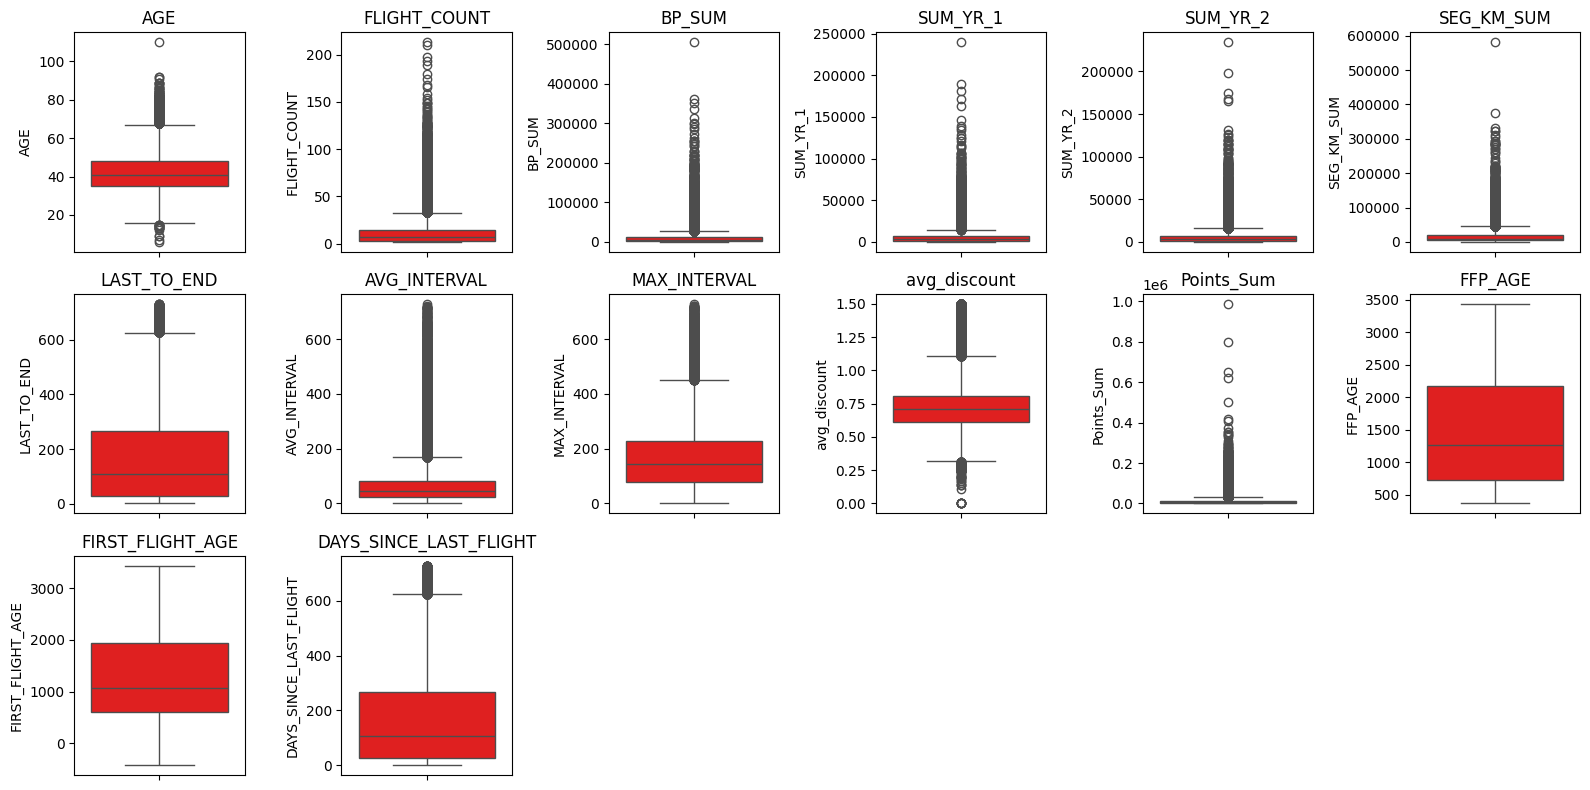

In [ ]:
# Menyesuaikan ukuran figure untuk keterbacaan yang lebih baik
plt.figure(figsize=(16, 8))

# Plotting boxplot untuk setiap fitur
for i in range(len(features)):
    plt.subplot(3, 6, i+1)  # Mengatur subplot sesuai jumlah fitur (3 baris x 5 kolom)
    sns.boxplot(y=df[features[i]], color='red')
    plt.title(features[i])
    plt.tight_layout()

plt.show()




In [ ]:
# Menentukan kolom numerik
numerical_cols = ['AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
            'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
            'avg_discount', 'Points_Sum','DAYS_SINCE_LAST_FLIGHT']


# Menghapus outlier berdasarkan IQR untuk setiap kolom numerik
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Jumlah data setelah menghapus outlier:", df.shape)

Jumlah data setelah menghapus outlier: (41177, 22)


In [ ]:
duplicates = df.duplicated().sum()
print("Duplicate Values:\n", duplicates)

Duplicate Values:
 0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Kolom kategorikal yang perlu di-label encoding
categorical_columns = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']

# Inisialisasi dan terapkan LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Verifikasi hasil label encoding
print(df[categorical_columns].head())


       GENDER  WORK_CITY  WORK_PROVINCE  WORK_COUNTRY
9712        1       1856            677            18
10155       1        606            367            21
10271       1       1819            726            18
10688       1       1108            560            18
10698       1       1856            677            18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41177 entries, 9712 to 62975
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MEMBER_NO               41177 non-null  int64  
 1   GENDER                  41177 non-null  int64  
 2   FFP_TIER                41177 non-null  int64  
 3   WORK_CITY               41177 non-null  int64  
 4   WORK_PROVINCE           41177 non-null  int64  
 5   WORK_COUNTRY            41177 non-null  int64  
 6   AGE                     41177 non-null  float64
 7   FLIGHT_COUNT            41177 non-null  int64  
 8   BP_SUM                  41177 non-null  int64  
 9   SUM_YR_1                41177 non-null  float64
 10  SUM_YR_2                41177 non-null  float64
 11  SEG_KM_SUM              41177 non-null  int64  
 12  LAST_TO_END             41177 non-null  int64  
 13  AVG_INTERVAL            41177 non-null  float64
 14  MAX_INTERVAL            41177 non-null  

# 2. Exploratory Data Analysis (EDA):

In [ ]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['GENDER', 'FFP_TIER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']

numericals = ['AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2',
              'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
              'EXCHANGE_COUNT','avg_discount', 'Points_Sum', 'Point_NotFlight',
              'FFP_AGE', 'FIRST_FLIGHT_AGE', 'DAYS_SINCE_LAST_FLIGHT']

In [ ]:
# numerical statistical summary
df[numericals].describe()

,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,FFP_AGE,FIRST_FLIGHT_AGE,DAYS_SINCE_LAST_FLIGHT
count,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000
mean,41.427083,6.821429,5112.776647,2725.944321,2623.175899,9187.794133,217.572844,59.811496,153.904000,0.089589,0.690168,5548.916653,1.623431,1402.072152,1205.800714,215.576851
std,9.153354,4.823130,3723.532378,2502.236707,2571.765445,6143.633654,194.428520,43.101276,107.792369,0.425545,0.150628,3970.941976,5.091186,822.234103,806.222218,194.422448
min,16.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.280515,0.000000,0.000000,365.000000,-425.000000,0.000000
25%,34.000000,3.000000,2131.000000,708.000000,245.000000,4175.000000,53.000000,29.687500,69.000000,0.000000,0.589501,2349.000000,0.000000,685.000000,557.000000,51.000000
50%,40.000000,5.000000,4122.000000,2160.000000,2002.000000,7662.000000,155.000000,51.750000,146.000000,0.000000,0.695018,4545.000000,0.000000,1179.000000,966.000000,153.000000
75%,47.000000,9.000000,7329.000000,4105.000000,4079.000000,13004.000000,345.000000,82.857143,222.000000,0.000000,0.793843,7997.000000,0.000000,2062.000000,1714.000000,343.000000
max,67.000000,33.000000,17535.000000,10898.000000,10975.000000,27483.000000,731.000000,194.000000,459.000000,15.000000,1.111670,17547.000000,66.000000,3437.000000,3435.000000,729.000000


In [ ]:
# describe method on categorical data
df[categoricals].describe()

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000
mean,0.745975,4.016563,1471.520703,617.662384,20.223061
std,0.435317,0.159132,436.840870,123.563089,9.887531
min,0.000000,4.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,1135.000000,605.000000,18.000000
50%,1.000000,4.000000,1336.000000,605.000000,18.000000
75%,1.000000,4.000000,1856.000000,677.000000,18.000000
max,1.000000,6.000000,2282.000000,805.000000,95.000000


In [ ]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of GENDER column
GENDER
1    30717
0    10460
Name: count, dtype: int64 

Value counts of FFP_TIER column
FFP_TIER
4    40681
5      310
6      186
Name: count, dtype: int64 

Value counts of WORK_CITY column
WORK_CITY
1329    5964
1108    5717
1819    3792
1858    2438
1190    1291
        ... 
1824       1
1376       1
951        1
847        1
865        1
Name: count, Length: 2283, dtype: int64 

Value counts of WORK_PROVINCE column
WORK_PROVINCE
605    12277
560     5269
726     3684
677     2618
776     1495
       ...  
300        1
120        1
324        1
670        1
240        1
Name: count, Length: 806, dtype: int64 

Value counts of WORK_COUNTRY column
WORK_COUNTRY
18    38080
31      677
45      557
41      386
83      252
      ...  
54        1
93        1
76        1
69        1
66        1
Name: count, Length: 96, dtype: int64 



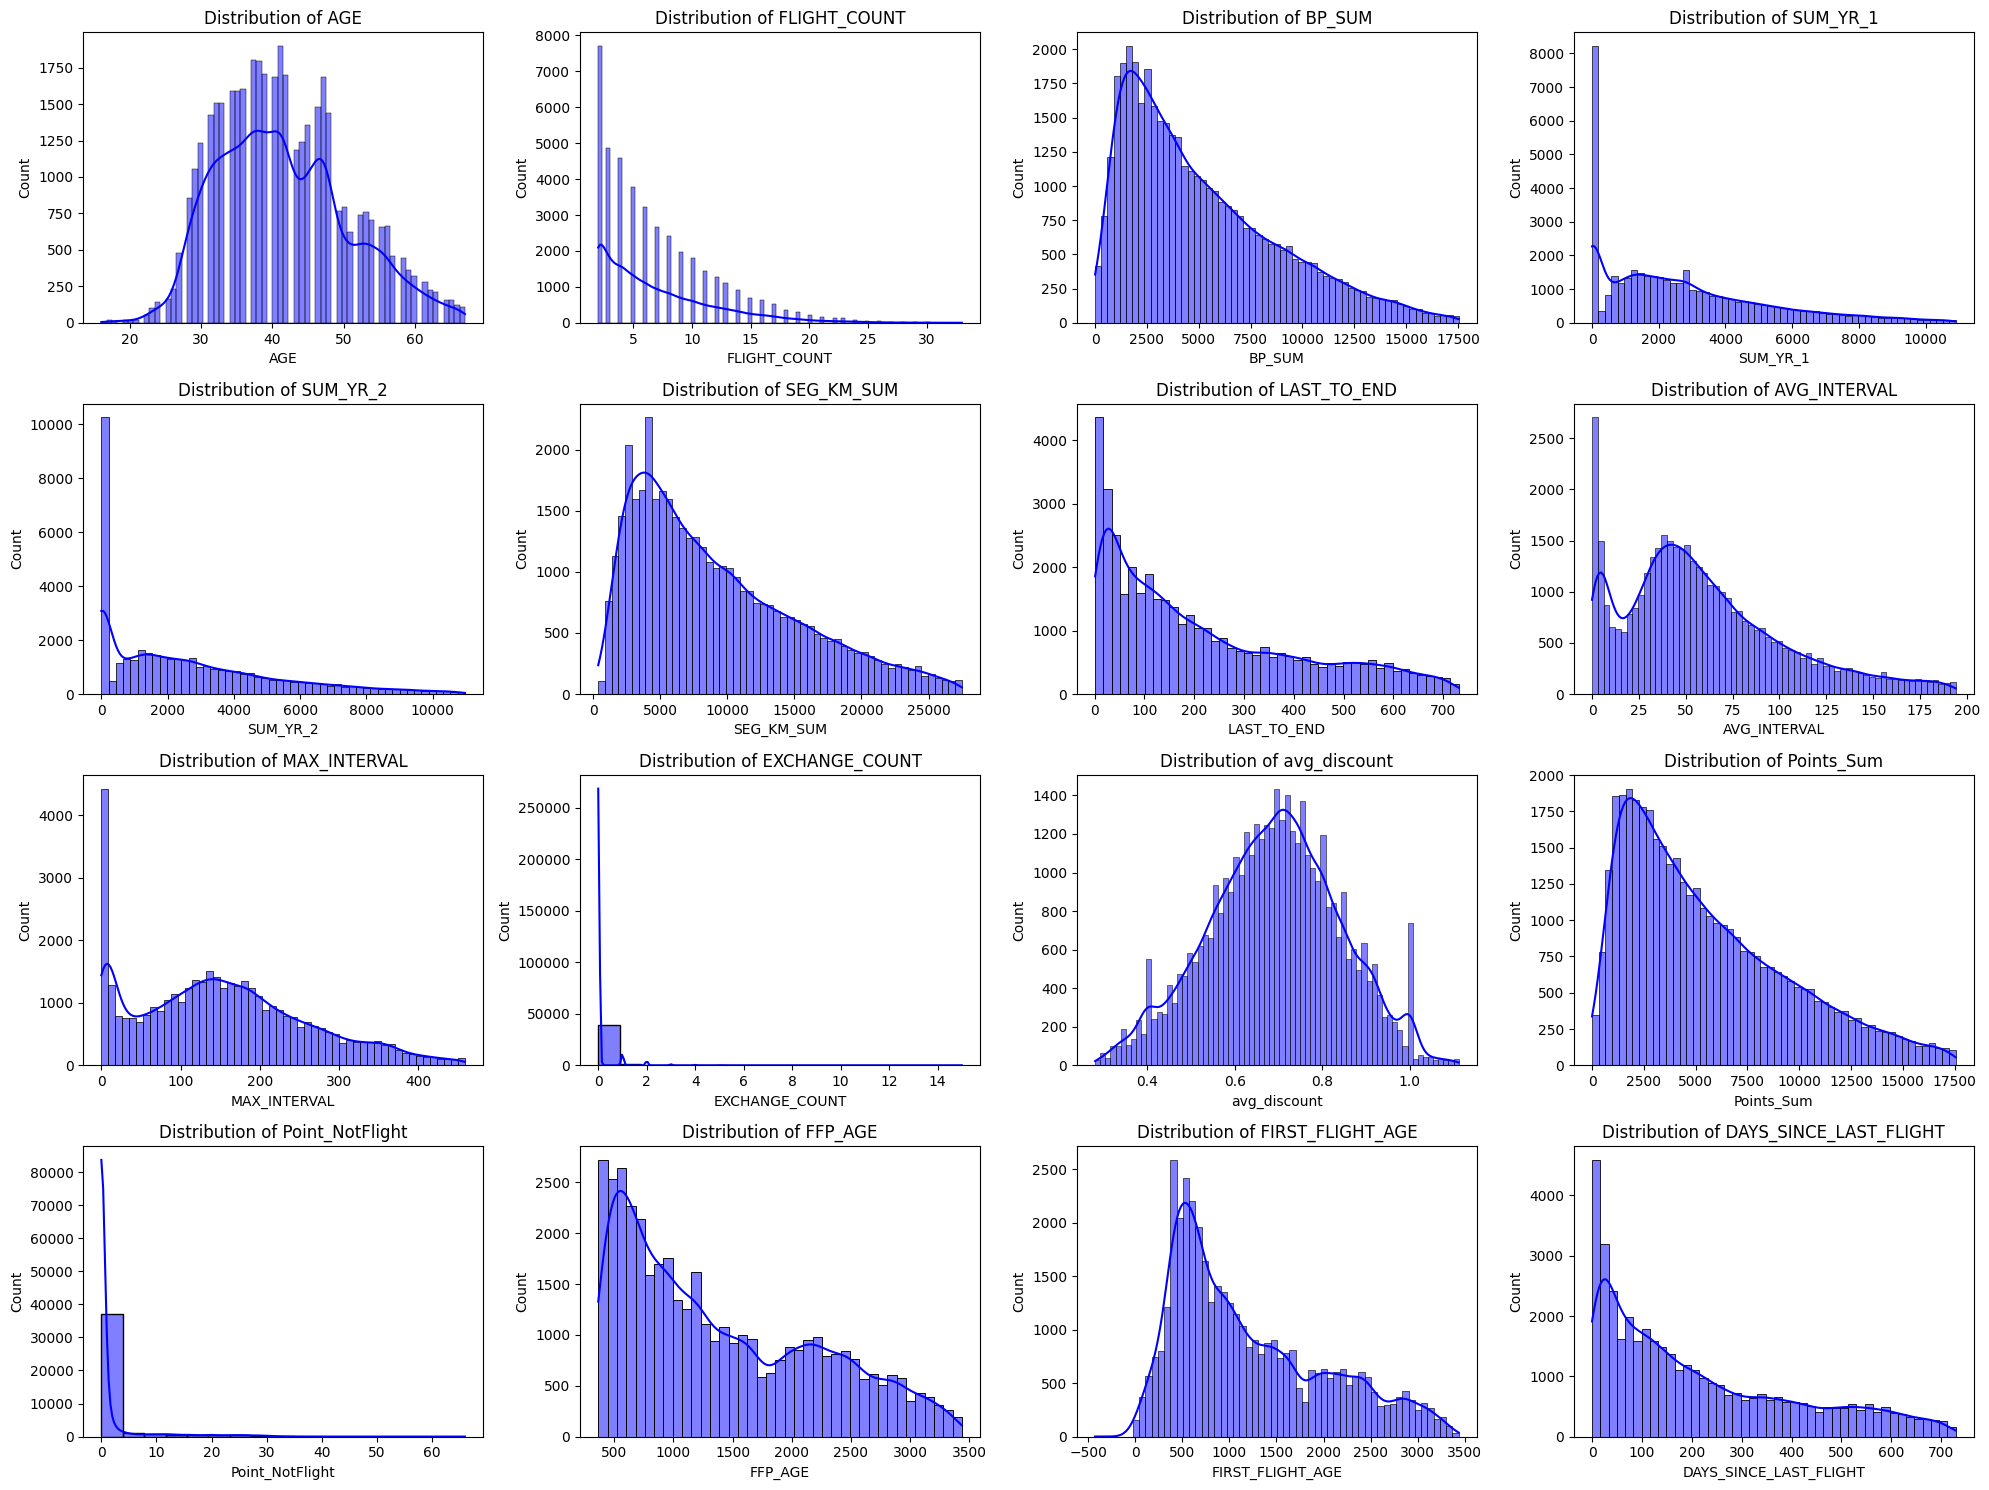

In [ ]:
# Menyesuaikan ukuran figure (panjang, tinggi)
plt.figure(figsize=(20, 15))

# Mengatur jumlah baris dan kolom untuk subplot
rows = 4  # Mengatur 4 baris
cols = 4  # Mengatur 4 kolom

# Plotting univariat untuk kolom numerik
for i in range(0, len(numericals)):
    plt.subplot(rows, cols, i+1)
    sns.histplot(df[numericals[i]], kde=True, color='blue')
    plt.title(f'Distribution of {numericals[i]}')
    plt.tight_layout()

plt.show()



# 3. Model K-Means Clustering:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41177 entries, 9712 to 62975
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MEMBER_NO               41177 non-null  int64  
 1   GENDER                  41177 non-null  int64  
 2   FFP_TIER                41177 non-null  int64  
 3   WORK_CITY               41177 non-null  int64  
 4   WORK_PROVINCE           41177 non-null  int64  
 5   WORK_COUNTRY            41177 non-null  int64  
 6   AGE                     41177 non-null  float64
 7   FLIGHT_COUNT            41177 non-null  int64  
 8   BP_SUM                  41177 non-null  int64  
 9   SUM_YR_1                41177 non-null  float64
 10  SUM_YR_2                41177 non-null  float64
 11  SEG_KM_SUM              41177 non-null  int64  
 12  LAST_TO_END             41177 non-null  int64  
 13  AVG_INTERVAL            41177 non-null  float64
 14  MAX_INTERVAL            41177 non-null  

In [ ]:
# Pilih fitur yang digunakan untuk clustering
features_for_clustering = [
    'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2',
    'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
    'avg_discount', 'Points_Sum','FFP_AGE', 'FIRST_FLIGHT_AGE',
    'DAYS_SINCE_LAST_FLIGHT', 'GENDER'
]

# Buat DataFrame baru dengan hanya fitur yang dipilih
df = df[features_for_clustering]

# Tampilkan 5 baris pertama dari DataFrame
df.head()


,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,avg_discount,Points_Sum,FFP_AGE,FIRST_FLIGHT_AGE,DAYS_SINCE_LAST_FLIGHT,GENDER
9712,40.0,13,17464,9995.0,9598.0,25064,104,41.500000,158,0.894019,17464,1728,1722,102,1
10155,59.0,11,15259,5810.0,10037.0,27482,15,69.300000,322,0.790371,15259,748,706,14,1
10271,33.0,17,16757,672.0,3123.0,27408,27,35.875000,74,0.786079,16757,599,599,26,1
10688,49.0,13,17481,9460.0,9543.0,27461,73,54.833333,154,0.761608,17481,3095,3095,71,1
10698,34.0,14,16689,9300.0,10046.0,20591,196,27.615385,108,1.014716,16689,1960,1960,194,1


In [ ]:
# Standarisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Konversi array NumPy kembali ke DataFrame Pandas
df_new = pd.DataFrame(df_scaled, columns=df.columns)

# Tampilkan statistik deskriptif
print(df_new.describe())


                AGE  FLIGHT_COUNT        BP_SUM      SUM_YR_1      SUM_YR_2  \
count  4.117700e+04  4.117700e+04  4.117700e+04  4.117700e+04  4.117700e+04   
mean  -1.894689e-16  9.387164e-17 -1.242419e-16  8.696931e-17 -4.279442e-17   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   
min   -2.777932e+00 -9.996596e-01 -1.373115e+00 -1.089416e+00 -1.020003e+00   
25%   -8.114155e-01 -7.923229e-01 -8.008022e-01 -8.064660e-01 -9.247363e-01   
50%   -1.559101e-01 -3.776493e-01 -2.660884e-01 -2.261781e-01 -2.415397e-01   
75%    6.088462e-01  4.516978e-01  5.952010e-01  5.511359e-01  5.660865e-01   
max    2.793864e+00  5.427780e+00  3.336180e+00  3.265940e+00  3.247546e+00   

         SEG_KM_SUM   LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  avg_discount  \
count  4.117700e+04  4.117700e+04  4.117700e+04  4.117700e+04  4.117700e+04   
mean  -7.178419e-17 -3.382140e-17  1.794605e-17  5.659908e-17  1.228614e-16   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.

In [ ]:
from sklearn.cluster import KMeans
list_inertia = []


for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(df_new)
  nilai_intertia = kmeans.inertia_
  list_inertia.append(nilai_intertia)
  print('cluster ke - ',i, 'jumlah centroid = ', i, 'nilai inertia : ', nilai_intertia)



cluster ke -  1 jumlah centroid =  1 nilai inertia :  617655.0000000062
cluster ke -  2 jumlah centroid =  2 nilai inertia :  467676.60070845817
cluster ke -  3 jumlah centroid =  3 nilai inertia :  396585.01751364354
cluster ke -  4 jumlah centroid =  4 nilai inertia :  364027.7379471576
cluster ke -  5 jumlah centroid =  5 nilai inertia :  341962.9680683661
cluster ke -  6 jumlah centroid =  6 nilai inertia :  322142.43296720483
cluster ke -  7 jumlah centroid =  7 nilai inertia :  309020.8143305625
cluster ke -  8 jumlah centroid =  8 nilai inertia :  297743.2301316369
cluster ke -  9 jumlah centroid =  9 nilai inertia :  287985.734923779
cluster ke -  10 jumlah centroid =  10 nilai inertia :  278977.56857032876


In [ ]:
list_inertia

[617655.0000000062,
 467676.60070845817,
 396585.01751364354,
 364027.7379471576,
 341962.9680683661,
 322142.43296720483,
 309020.8143305625,
 297743.2301316369,
 287985.734923779,
 278977.56857032876]

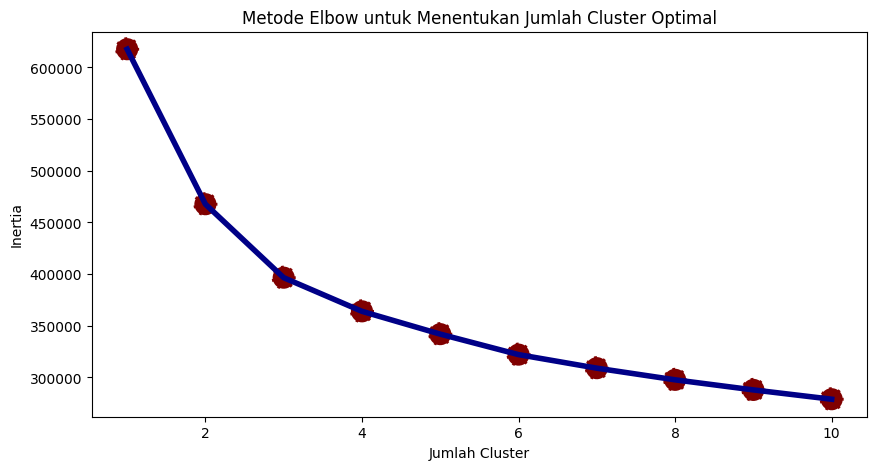

In [ ]:
plt.figure(figsize=(10, 5))

sns.lineplot(x=range(1, 11), y=list_inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=list_inertia, s=300, color='#800000',  linestyle='--')

plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_new)
    preds = kmeans.predict(df_new)

    score_euclidean = silhouette_score(df_new, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

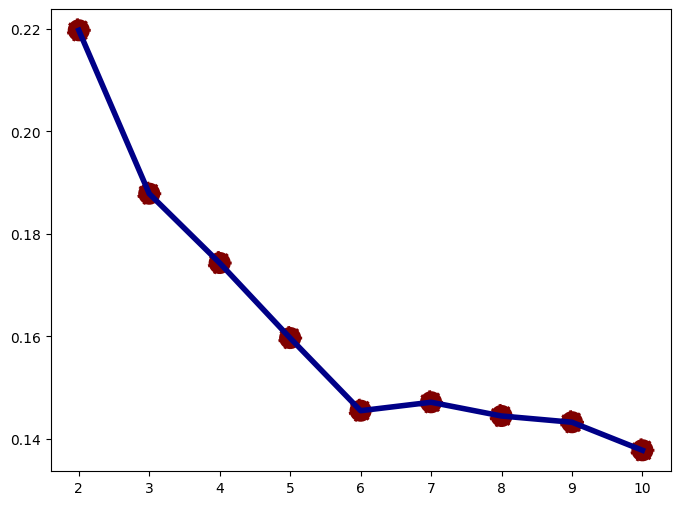

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

In [ ]:
# Hasil cluster optimal adala 2 cluster berdasarakan Elbow Method dan silhouette_score

optimal_clusters = 2

# Lakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_new)

kmeans


KMeans(n_clusters=2, random_state=42)

In [ ]:
df.head()

,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,avg_discount,Points_Sum,FFP_AGE,FIRST_FLIGHT_AGE,DAYS_SINCE_LAST_FLIGHT,GENDER,Cluster
9712,40.0,13,17464,9995.0,9598.0,25064,104,41.500000,158,0.894019,17464,1728,1722,102,1,0
10155,59.0,11,15259,5810.0,10037.0,27482,15,69.300000,322,0.790371,15259,748,706,14,1,0
10271,33.0,17,16757,672.0,3123.0,27408,27,35.875000,74,0.786079,16757,599,599,26,1,0
10688,49.0,13,17481,9460.0,9543.0,27461,73,54.833333,154,0.761608,17481,3095,3095,71,1,0
10698,34.0,14,16689,9300.0,10046.0,20591,196,27.615385,108,1.014716,16689,1960,1960,194,1,0


In [ ]:
# Menampilkan jumlah anggota setiap cluster
print(df['Cluster'].value_counts())

Cluster
1    25947
0    15230
Name: count, dtype: int64


# 4. Visualisasi Hasil Clustering:

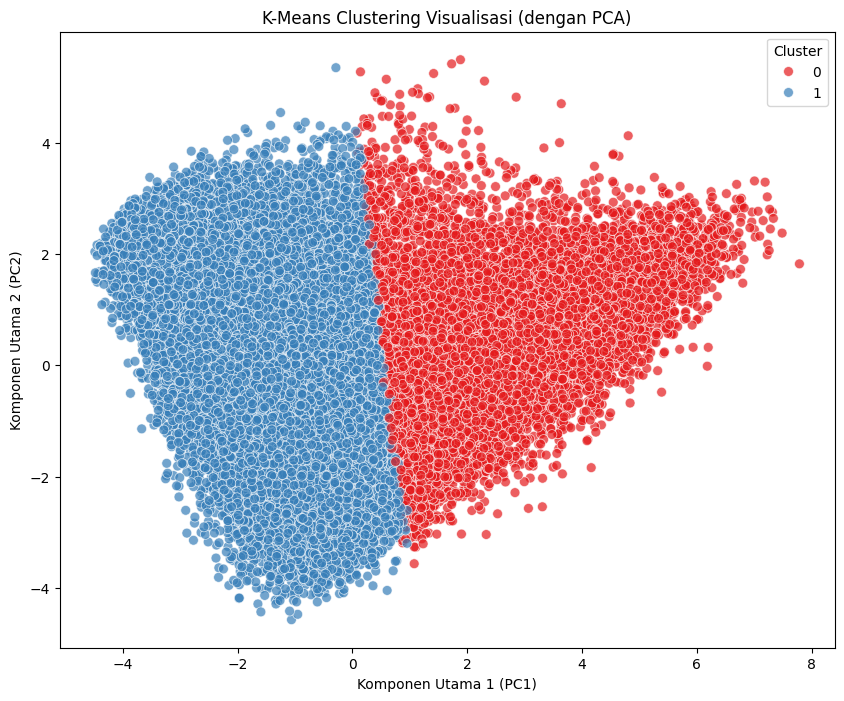

In [ ]:
# PCA untuk visualisasi
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_new)

# Tambahkan komponen PCA ke dalam DataFrame
df_pca = df.copy()
df_pca['PC1'] = principal_components[:, 0]
df_pca['PC2'] = principal_components[:, 1]

# Visualisasi hasil clustering menggunakan scatter plot dengan PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='Set1', s=50, alpha=0.7)
plt.title('K-Means Clustering Visualisasi (dengan PCA)')
plt.xlabel('Komponen Utama 1 (PC1)')
plt.ylabel('Komponen Utama 2 (PC2)')
plt.legend(title='Cluster')
plt.show()



# 5. Interpretasi dan Evaluasi Model:

In [ ]:
# Melihat distribusi data dalam setiap cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print('Distribusi Data dalam Setiap Cluster:')
print(cluster_counts)



Distribusi Data dalam Setiap Cluster:
Cluster
0    15230
1    25947
Name: count, dtype: int64


In [ ]:
# Analisis Statistik Deskriptif Setiap Cluster untuk fitur yang relevan
features_relevant = [
    'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2',
    'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
    'avg_discount', 'Points_Sum','FFP_AGE', 'FIRST_FLIGHT_AGE',
    'DAYS_SINCE_LAST_FLIGHT', 'GENDER'
]

# Menghitung rata-rata fitur per cluster
cluster_analysis = df.groupby('Cluster')[features_relevant].mean()

# Menampilkan hasil
print('\nStatistik Deskriptif Rata-Rata untuk Setiap Cluster:')
print(cluster_analysis)



Statistik Deskriptif Rata-Rata untuk Setiap Cluster:
               AGE  FLIGHT_COUNT       BP_SUM     SUM_YR_1     SUM_YR_2  \
Cluster                                                                   
0        42.560735     11.490151  8950.639527  4322.513854  4824.488181   
1        40.761668      4.081050  2860.082630  1788.812706  1331.081011   

           SEG_KM_SUM  LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  avg_discount  \
Cluster                                                                        
0        15417.597439    96.803086     54.619630    192.307420      0.713047   
1         5531.113038   288.460554     62.858944    131.362508      0.676739   

          Points_Sum      FFP_AGE  FIRST_FLIGHT_AGE  DAYS_SINCE_LAST_FLIGHT  \
Cluster                                                                       
0        9494.703874  1547.466645       1398.892974               94.838214   
1        3232.874745  1316.730566       1092.462173              286.446294   

       

In [ ]:
# Menghitung distribusi gender dalam setiap cluster
gender_distribution = df.groupby('Cluster')['GENDER'].value_counts(normalize=True).unstack()

print("Distribusi GENDER per Cluster:\n", gender_distribution)


Distribusi GENDER per Cluster:
 GENDER          0         1
Cluster                    
0        0.209586  0.790414
1        0.280109  0.719891


# Cluster Analysis Report

## Analisis Hasil Clustering

Hasil clustering memberikan gambaran tentang bagaimana pelanggan terbagi ke dalam dua cluster berdasarkan fitur-fitur yang dipilih. Berikut adalah analisis dari hasil statistik deskriptif rata-rata setiap cluster dan distribusi GENDER:

---

### 1. Cluster 0:

- **AGE:** Rata-rata usia pelanggan di Cluster 0 adalah sekitar 42,56 tahun, menunjukkan bahwa mereka cenderung lebih tua dibandingkan pelanggan di cluster lain.
- **FLIGHT_COUNT:** Rata-rata jumlah penerbangan adalah 11,49, menunjukkan pelanggan di cluster ini sering melakukan penerbangan.
- **BP_SUM:** Jumlah poin yang diperoleh dari pembelian tiket adalah 8950,63, yang lebih tinggi dibandingkan cluster lain, menandakan mereka sering melakukan pembelian tiket dengan nilai tinggi.
- **SUM_YR_1 & SUM_YR_2:** Pengeluaran tahunan mereka masing-masing adalah 4322,51 dan 4824,48, memperkuat bahwa mereka adalah pelanggan dengan pengeluaran tinggi.
- **SEG_KM_SUM:** Jarak total perjalanan adalah 15417,59 km, menunjukkan bahwa mereka bepergian dalam jarak yang lebih jauh.
- **LAST_TO_END:** Nilai 96,80 menunjukkan mereka masih aktif terbang dalam jangka waktu terakhir.
- **AVG_INTERVAL & MAX_INTERVAL:** Interval rata-rata adalah 54,61 hari, dan interval maksimal 192,30 hari, menunjukkan frekuensi penerbangan yang cukup teratur.
- **avg_discount:** Diskon rata-rata yang didapatkan adalah 71,30%, sedikit lebih tinggi dibandingkan cluster lain.
- **Points_Sum:** Jumlah total poin adalah 9494,70, yang menunjukkan tingkat loyalitas yang tinggi.
- **FFP_AGE & FIRST_FLIGHT_AGE:** Usia keanggotaan dan usia penerbangan pertama mereka adalah 1547,47 hari dan 1398,89 hari, menunjukkan mereka sudah lama menjadi anggota.
- **DAYS_SINCE_LAST_FLIGHT:** Rata-rata mereka baru-baru ini melakukan penerbangan terakhir mereka sekitar 94,8 hari yang lalu.
- **Distribusi GENDER:** Mayoritas dalam cluster ini adalah laki-laki (79,04%).

**Kesimpulan:** Cluster 0 terdiri dari pelanggan yang lebih tua, sering terbang, dan memiliki nilai loyalitas tinggi. Mereka merupakan pelanggan yang sangat berharga.

---

### 2. Cluster 1:

- **AGE:** Rata-rata usia pelanggan di Cluster 1 adalah 40,76 tahun, sedikit lebih muda dibandingkan Cluster 0.
- **FLIGHT_COUNT:** Rata-rata jumlah penerbangan adalah 4,08, menunjukkan mereka terbang lebih jarang dibandingkan pelanggan di Cluster 0.
- **BP_SUM:** Jumlah poin yang diperoleh dari pembelian tiket adalah 2860,08, yang jauh lebih rendah dibandingkan Cluster 0.
- **SUM_YR_1 & SUM_YR_2:** Pengeluaran tahunan mereka masing-masing adalah 1788,81 dan 1331,08, lebih rendah dibandingkan Cluster 0.
- **SEG_KM_SUM:** Jarak total perjalanan adalah 5531,11 km, lebih rendah dibandingkan Cluster 0.
- **LAST_TO_END:** Nilai 288,46 menunjukkan bahwa mereka kurang aktif dalam jangka waktu terakhir.
- **AVG_INTERVAL & MAX_INTERVAL:** Interval rata-rata adalah 62,86 hari, dengan interval maksimal 131,36 hari, menunjukkan frekuensi penerbangan yang kurang teratur.
- **avg_discount:** Diskon rata-rata yang didapatkan adalah 67,67%, sedikit lebih rendah dibandingkan Cluster 0.
- **Points_Sum:** Jumlah total poin adalah 3232,87, yang juga lebih rendah dibandingkan Cluster 0.
- **FFP_AGE & FIRST_FLIGHT_AGE:** Usia keanggotaan dan usia penerbangan pertama mereka adalah 1316,73 hari dan 1092,46 hari, menunjukkan mereka mungkin lebih baru dalam program loyalitas.
- **DAYS_SINCE_LAST_FLIGHT:** Rata-rata mereka melakukan penerbangan terakhir mereka sekitar 286,45 hari yang lalu.
- **Distribusi GENDER:** Sebagian besar dalam cluster ini juga laki-laki (71,99%).

**Kesimpulan:** Cluster 1 terdiri dari pelanggan yang lebih muda, terbang dengan frekuensi lebih rendah, dan memiliki nilai loyalitas yang lebih rendah. Mereka mungkin berpotensi untuk dioptimalkan lebih lanjut.

---


## Kesimpulan Umum

Hasil clustering membagi pelanggan menjadi dua kelompok dengan karakteristik yang berbeda:

- **Cluster 0** adalah kelompok pelanggan yang sangat aktif dan bernilai tinggi. Mereka memiliki frekuensi penerbangan tinggi, pengeluaran tahunan yang besar, dan tingkat loyalitas yang tinggi. Sebagian besar pelanggan di cluster ini adalah laki-laki dengan rata-rata usia sekitar 42,6 tahun. Mereka sering bepergian, mendapatkan diskon yang lebih tinggi, dan memiliki jarak perjalanan yang lebih jauh. Strategi pemasaran yang disarankan termasuk penawaran eksklusif dan program loyalitas yang mendalam untuk mempertahankan dan meningkatkan hubungan dengan pelanggan ini.

- **Cluster 1** terdiri dari pelanggan yang kurang aktif dibandingkan dengan Cluster 0. Mereka memiliki frekuensi penerbangan lebih rendah, pengeluaran tahunan yang lebih kecil, dan nilai loyalitas yang lebih rendah. Rata-rata usia pelanggan di cluster ini adalah sekitar 40,8 tahun (sedikit kebih muda dari cluster 0), dengan sebagian besar juga laki-laki. Mereka mendapatkan diskon yang lebih rendah dan jarak perjalanan mereka juga lebih pendek. Untuk pelanggan di cluster ini, strategi yang disarankan adalah memberikan insentif menarik seperti diskon khusus atau penawaran untuk meningkatkan frekuensi penerbangan dan pengeluaran mereka.

Secara keseluruhan, Cluster 0 mewakili pelanggan dengan nilai tinggi yang perlu dipertahankan dengan penawaran khusus, sementara Cluster 1 berpotensi untuk ditingkatkan dengan strategi pemasaran yang dirancang untuk meningkatkan keterlibatan dan loyalitas mereka.


## Rekomendasi:

- **Cluster 0:** Fokus pada mempertahankan dan memperdalam hubungan dengan pelanggan ini dengan penawaran eksklusif dan program loyalitas yang diperluas.
- **Cluster 1:** Pertimbangkan untuk memberikan insentif yang menarik untuk meningkatkan frekuensi penerbangan dan pengeluaran mereka. Program promosi atau diskon khusus dapat membantu meningkatkan aktivitas mereka.


untuk perbandingan menggunakan 3 cluster:
link sebegai berikut: https://colab.research.google.com/drive/1swax0FfxNUutvH3Jex9C29wZJCibLcYE?usp=sharing
